## PyCaret Tutorial for Regression analyses
#### NOTE) PyCaret can be installed easilily by the following command: 
#### $pip install pycaret

In [1]:
"""
    import library 
"""
##-- Pandas
import pandas as pd
from pandas import Series, DataFrame
##-- Matplotlib
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib.cm as cm # for gradation
import seaborn as sns
##-- Scikit-learn
import sklearn  #-- print(sklearn.__version__)
##-- PyCaret
##-- https://github.com/pycaret
import pycaret

#### Dataset: House prices in Boston from scikit-learn dataset

In [2]:
##-- Load the boston house-prices dataset from sklearn
##-- https://scikit-learn.org/stable/datasets/index.html#boston-dataset
from sklearn.datasets import load_boston
dataset = load_boston()
samples, label, feature_names = dataset.data, dataset.target, dataset.feature_names

In [3]:
f = pd.DataFrame(dataset.data)
f.columns = dataset.feature_names
f["PRICES"] = dataset.target
f.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


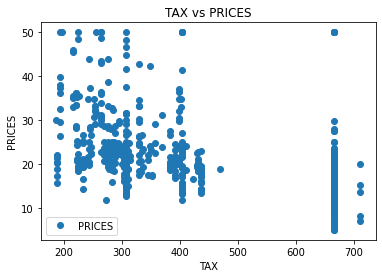

In [4]:
##-- Ex. "RM" vs "PRICE"
f.plot(x="TAX", y="PRICES", style="o")
plt.title("TAX vs PRICES")
plt.ylabel("PRICES")
plt.show()

In [5]:
##-- feature name to use
TargetName = "PRICES"
FeaturesName = [\
              #-- "Crime occurrence rate per unit population by town"
              "CRIM",\
              #-- "Percentage of 25000-squared-feet-area house"
              'ZN',\
              #-- "Percentage of non-retail land area by town"
              'INDUS',\
              #-- "Index for Charlse river: 0 is near, 1 is far"
              'CHAS',\
              #-- "Nitrogen compound concentration"
              'NOX',\
              #-- "Average number of rooms per residence"
              'RM',\
              #-- "Percentage of buildings built before 1940"
              'AGE',\
              #-- 'Weighted distance from five employment centers'
              "DIS",\
              ##-- "Index for easy access to highway"
              'RAD',\
              ##-- "Tax rate per $100,000"
              'TAX',\
              ##-- "Percentage of students and teachers in each town"
              'PTRATIO',\
              ##-- "1000(Bk - 0.63)^2, where Bk is the percentage of Black people"
              'B',\
              ##-- "Percentage of low-class population"
              'LSTAT',\
              ]

In [6]:
###-- Devide the dataset into train- and test- datasets
split_rate = 0.8
data = f.iloc[ : int(split_rate*len(f)), :]
data_pre = f.iloc[ int(split_rate*len(f)) :, :]

### Set up the environment for PyCaret by "setup" module

In [7]:
from pycaret.regression import *

In [8]:
model_reg = setup(data = data, target = "PRICES", session_id=99)
##-- NOTE: "session_id" is almost "random_seed".


Setup Succesfully Completed!


,Description,Value
0,session_id,99
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(404, 14)"
4,Missing Values,False
5,Numeric Features,12
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


### Comparison between all models by "compare_models()".
### NOTE) "compare_models()" just compares models, NOT return any trained models.

In [9]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,1.909000,9.867800,2.829800,0.881000,0.117200,0.085500
1,Extra Trees Regressor,2.078800,10.382900,2.937700,0.873200,0.117000,0.091900
2,Gradient Boosting Regressor,2.152400,10.948400,3.043700,0.865500,0.126800,0.096800
3,Random Forest,2.208000,11.592800,3.117600,0.860800,0.128800,0.099500
4,Light Gradient Boosting Machine,2.335800,11.638500,3.207900,0.856500,0.142600,0.110700
5,Extreme Gradient Boosting,2.163300,11.271900,3.082600,0.856200,0.131000,0.100000
6,AdaBoost Regressor,2.757500,14.073900,3.537800,0.826800,0.153100,0.130600
7,Bayesian Ridge,2.896800,17.851200,4.041800,0.775800,0.222400,0.138800
8,Ridge Regression,2.888000,17.882500,4.038100,0.775300,0.225700,0.139100
9,Decision Tree,2.905300,17.324300,4.051400,0.775200,0.160100,0.124600


### Create each model by "create_model" module.
### NOTE)
### 1. Cross validation is stratified CV.

##### Estimator                           :  Abbreviated String
#####
##### Linear Regression                   :	‘lr’
##### Lasso Regression                    :	‘lasso’
##### Ridge Regression                    :	‘ridge’
##### Elastic Net                         :	‘en’
##### Least Angle Regression              :	‘lar’
##### Lasso Least Angle Regression        :	‘llar’
##### Orthogonal Matching Pursuit         :	‘omp’
##### Bayesian Ridge                      :	‘br’
##### Automatic Relevance Determination   :	‘ard’
##### Passive Aggressive Regressor        :	‘par’
##### Random Sample Consensus             :	‘ransac’
##### TheilSen Regressor                  :	‘tr’
##### Huber Regressor                     :	‘huber’
##### Kernel Ridge                        :	‘kr’
##### Support Vector Machine              :	‘svm’
##### K Neighbors Regressor               :	‘knn’
##### Decision Tree                       :	‘dt’
##### Random Forest                       :	‘rf’
##### Extra Trees Regressor               :	‘et’
##### AdaBoost Regressor                  :	‘ada’
##### Gradient Boosting Regressor         :	‘gbr’
##### Multi Level Perceptron              :	‘mlp’
##### Extreme Gradient Boosting           :	‘xgboost’
##### Light Gradient Boosting             :	‘lightgbm’
##### CatBoost Regressor                  :	‘catboost’

#### "lgbm": Light Gradient Boosting Machine

In [10]:
lightgbm = create_model('lightgbm', fold=5) #-- "fold" is number of folds for CV. 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.2470,9.3050,3.0504,0.8878,0.1535,0.1204
1,2.2933,9.3618,3.0597,0.8892,0.1250,0.0972
2,2.0838,7.5882,2.7547,0.8896,0.1233,0.0928
3,2.8204,23.7177,4.8701,0.6801,0.1867,0.1293
4,1.9076,5.8668,2.4221,0.9338,0.1091,0.0884
Mean,2.2704,11.1679,3.2314,0.8561,0.1395,0.1056
SD,0.3066,6.4054,0.8520,0.0897,0.0277,0.0162


In [11]:
##-- Model detail
print(lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=99, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### Examples of other models
#### "catboost": Catboost
#### "br" : Bayesian Ridge
#### "dt" : Desicion Tree

In [12]:
# catboost = create_model("catboost", fold=3)
# print(catboost)
# br = create_model('br', fold=3)
# print(br)
# dt = create_model('dt', fold=3)
# print(dt)

### Tuned Model
#### NOTE1: The model, created by "create_model()" function, uses the DEFAULT hyperparameters. "tune_model()" function automatically tunes the hyperparameters on the given datasets.
####
#### NOTE2: tune_model() does not take a trained model object as an input.

In [14]:
tuned_lightgbm = tune_model('lightgbm', fold=5)
"""
<Default params>
estimator=None, 
fold=10, 
round=4, 
n_iter=10, 
optimize='r2', 
ensemble=False, 
method=None, 
verbose=True
"""

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1541,8.7144,2.9520,0.8949,0.1496,0.1164
1,2.2605,9.5959,3.0977,0.8865,0.1295,0.0981
2,2.1527,8.1339,2.8520,0.8817,0.1271,0.0966
3,2.8494,24.4000,4.9396,0.6709,0.1881,0.1301
4,1.8803,5.5807,2.3624,0.9370,0.1076,0.0869
Mean,2.2594,11.2850,3.2407,0.8542,0.1404,0.1056
SD,0.3207,6.6923,0.8846,0.0937,0.0273,0.0155


"\n<Default params>\nestimator=None, \nfold=10, \nround=4, \nn_iter=10, \noptimize='r2', \nensemble=False, \nmethod=None, \nverbose=True\n"

In [15]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=90,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.6,
              n_estimators=150, n_jobs=-1, num_leaves=100, objective=None,
              random_state=99, reg_alpha=0.3, reg_lambda=0.4, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### Plot Models

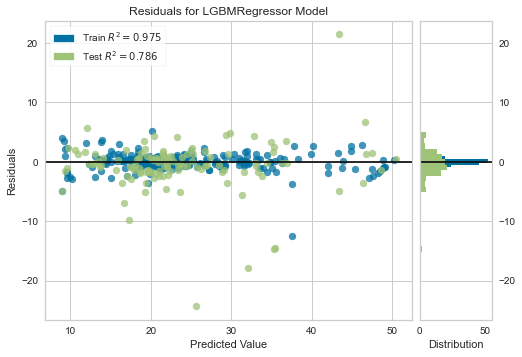

In [16]:
###-- Residual Plot
plot_model(tuned_lightgbm)

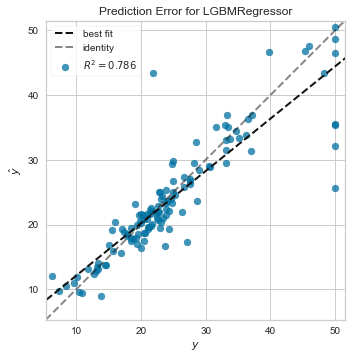

In [17]:
###-- Prediction Error Plot
plot_model(tuned_lightgbm, plot = 'error')

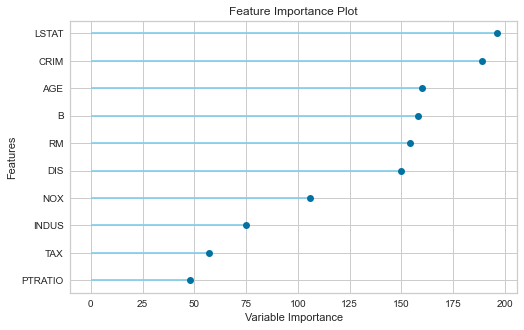

In [18]:
###-- Feature Importance Plot
plot_model(tuned_lightgbm, plot='feature')

#### "evaluate_model()" function enables us to confirm all of the available plots with the user interface.

In [20]:
"""
    You can manually select the plot type !! 
"""
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Final model

In [21]:
final_lightgbm = finalize_model(tuned_lightgbm)
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=90,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.6,
              n_estimators=150, n_jobs=-1, num_leaves=100, objective=None,
              random_state=99, reg_alpha=0.3, reg_lambda=0.4, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [22]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.8393,1.6854,1.2982,0.9826,0.0763,0.0441


### Prediction on test data

In [23]:
unseen_predictions = predict_model(final_lightgbm, data=data_pre)
unseen_predictions.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES,Label
0,41.52920,0.0,18.1,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38,8.5,9.0020
1,67.92080,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0,13.2100
2,20.71620,0.0,18.1,0.0,0.659,4.138,100.0,1.1781,24.0,666.0,20.2,370.22,23.34,11.9,21.9118
3,11.95110,0.0,18.1,0.0,0.659,5.608,100.0,1.2852,24.0,666.0,20.2,332.09,12.13,27.9,27.9016
4,7.40389,0.0,18.1,0.0,0.597,5.617,97.9,1.4547,24.0,666.0,20.2,314.64,26.40,17.2,23.3796
